In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


We want to examine the relationship between the population of countries and their GDP in the year 2007.


In [6]:
data_2007 = data[data.year == 2007]
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [11]:
#now lets calculate the GDP
#by multiplying population by gdpPerCapita
gdp_billions = (data_2007.population*data_2007.gdpPerCapita)/10**9

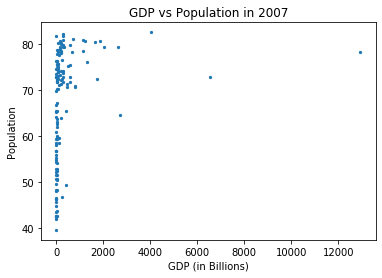

In [13]:
#creating the scatter plot
plt.scatter(gdp_billions, data_2007.lifeExpectancy, 5)
plt.title('GDP vs Population in 2007')
plt.xlabel('GDP (in Billions)')
plt.ylabel('Population')
plt.show()

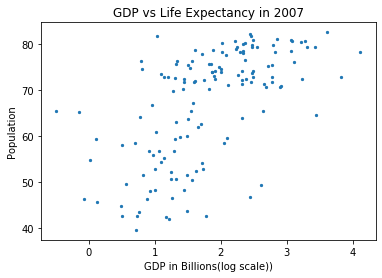

In [15]:
#to see the true picture of the nature of correlation
#lets plot the log scale values of total gdp
plt.scatter(np.log10(gdp_billions), data_2007.lifeExpectancy, 5)
plt.title('GDP vs Life Expectancy in 2007')
plt.xlabel('GDP in Billions(log scale))')
plt.ylabel('Population')
plt.show()

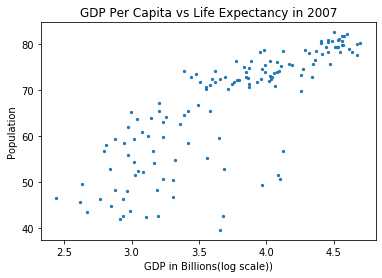

In [17]:
#it seems the correlation is not so clearly positive between
#gdp and life expectancy, and this makes sense. 
#because although a country may have high gdp, it does not 
#necessarily mean its people automatically live longer.
#other factors can contribute to life expectancy.
# gdpPercapita, however, may be a better explainer variable
#Let's check and see
plt.scatter(np.log10(data_2007.gdpPerCapita), 
            data_2007.lifeExpectancy, 5)
plt.title('GDP Per Capita vs Life Expectancy in 2007')
plt.xlabel('GDP in Billions(log scale))')
plt.ylabel('Population')
plt.show()

In [18]:
#the new plot shows a more clearer positive correlation between 
#GDP (per capita) and life expectancy. This makes sense, because
#though a country may have high national gdp, its gdp may be 
#lower due to high population

#to test the strong correlation, let's check using the corr() func

print('Correlation Between GDP and Life Expectancy in 2007:')
print(gdp_billions.corr(data_2007.lifeExpectancy))
print('Correlation Between log10 of GDP and Life Expectancy in 2007:')
print(np.log10(gdp_billions).corr(data_2007.lifeExpectancy))
print('Correlation Between GDP Per Capita and Life Expectancy in 2007:')
print(data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy))
print('Correlation Between log10 of GDP Per Capita and Life Expectancy in 2007:')
print(np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy))

Correlation Between GDP and Life Expectancy in 2007:
0.22940871508473848
Correlation Between log10 of GDP and Life Expectancy in 2007:
0.6000405376447576
Correlation Between GDP Per Capita and Life Expectancy in 2007:
0.6786623986777587
Correlation Between log10 of GDP Per Capita and Life Expectancy in 2007:
0.8089802514849214


In [19]:
# The results above show that the model with gdp per capita
# is a more robust model for explaining life expectancy.